In [2]:
# librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

In [3]:
df_estudiantes = pd.read_csv("../data/df_estudiantes.csv")
df_estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_uuid                    7010 non-null   object 
 1   course_uuid                  7010 non-null   object 
 2   legajo                       7010 non-null   object 
 3   course_name                  7010 non-null   object 
 4   periodo                      7010 non-null   object 
 5   particion                    7010 non-null   int64  
 6   fecha_mesa_epoch             7010 non-null   object 
 7   nombre_examen                7010 non-null   object 
 8   nota_parcial                 7010 non-null   float64
 9   nota_final_materia           7010 non-null   float64
 10  aprobado                     7010 non-null   int64  
 11  rango_nota                   7010 non-null   object 
 12  diferencia_notas             7010 non-null   float64
 13  promedio_nota_parc

- Veamos un histograma distribucion de calificaciones 

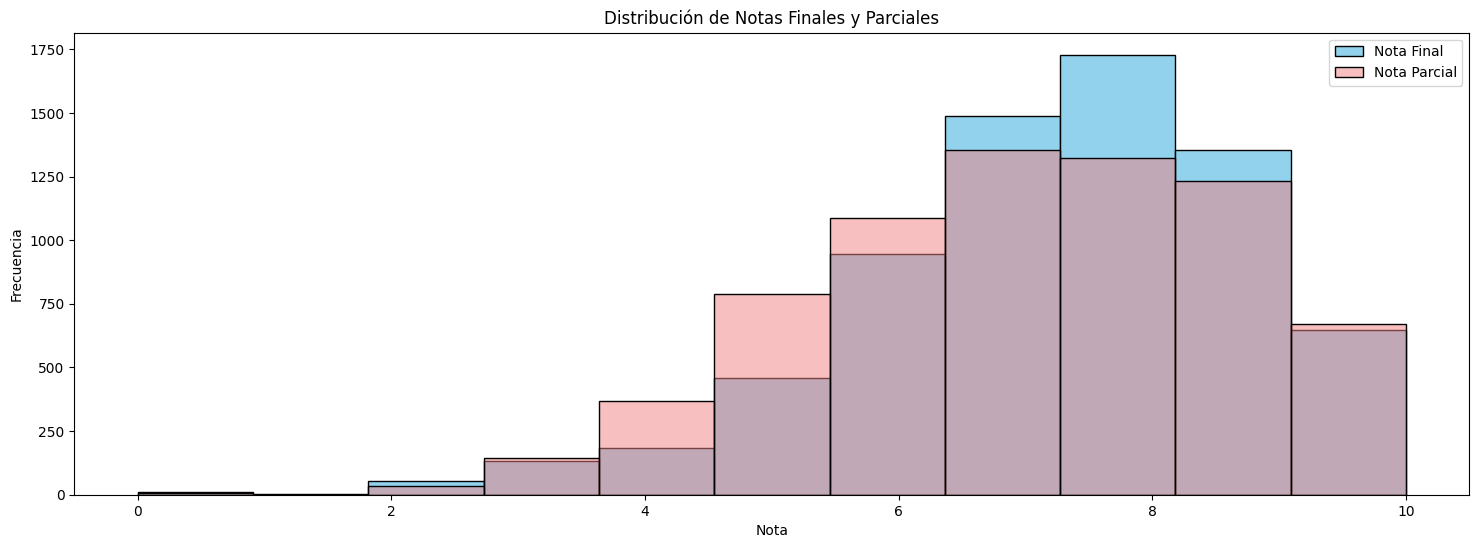

In [4]:
plt.figure(figsize=(18, 6))
sns.histplot(df_estudiantes["nota_final_materia"], bins=11, color="skyblue", label="Nota Final", alpha=0.9)
sns.histplot(df_estudiantes["nota_parcial"], bins=11, color="lightcoral", label="Nota Parcial", alpha=0.5)

plt.title("Distribución de Notas Finales y Parciales")
plt.xlabel("Nota")
plt.ylabel("Frecuencia")
plt.legend()  
plt.show()

En el grafico anterior podemos notar que los datos presentan una distribución asimetrica hacia la izquierda!

- La mayoria de los alumnos obtuvo calificaciones buenas o excelentes.
- Hay un numero reducido de alumnos con calificaciones bajas o desaprobadas.

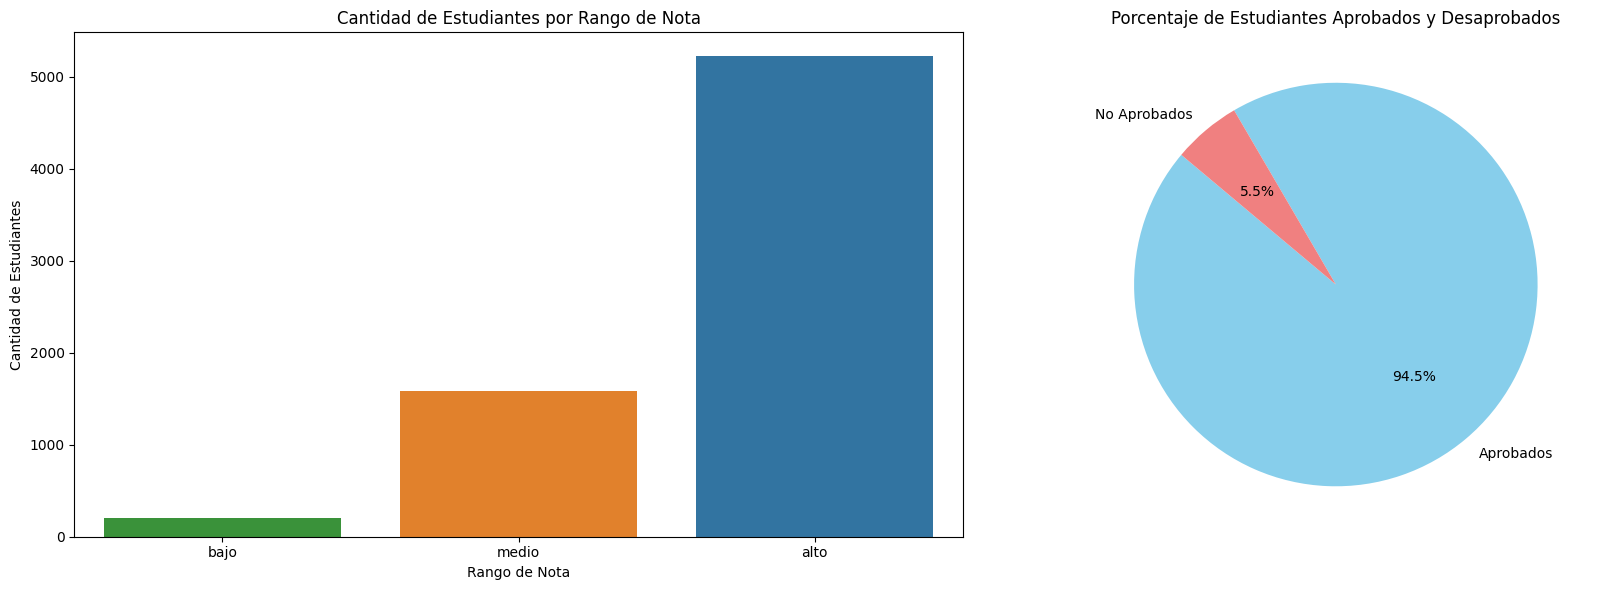

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(x="rango_nota", hue="rango_nota", data=df_estudiantes, order=["bajo", "medio", "alto"], ax=axes[0], legend=False) 

axes[0].set_title("Cantidad de Estudiantes por Rango de Nota")
axes[0].set_xlabel("Rango de Nota")
axes[0].set_ylabel("Cantidad de Estudiantes")

aprobados = df_estudiantes["aprobado"].value_counts()
axes[1].pie(aprobados, labels=["Aprobados","No Aprobados"], autopct="%1.1f%%", startangle=140, colors=["skyblue","lightcoral"])
axes[1].set_title("Porcentaje de Estudiantes Aprobados y Desaprobados")

plt.tight_layout()
plt.show()

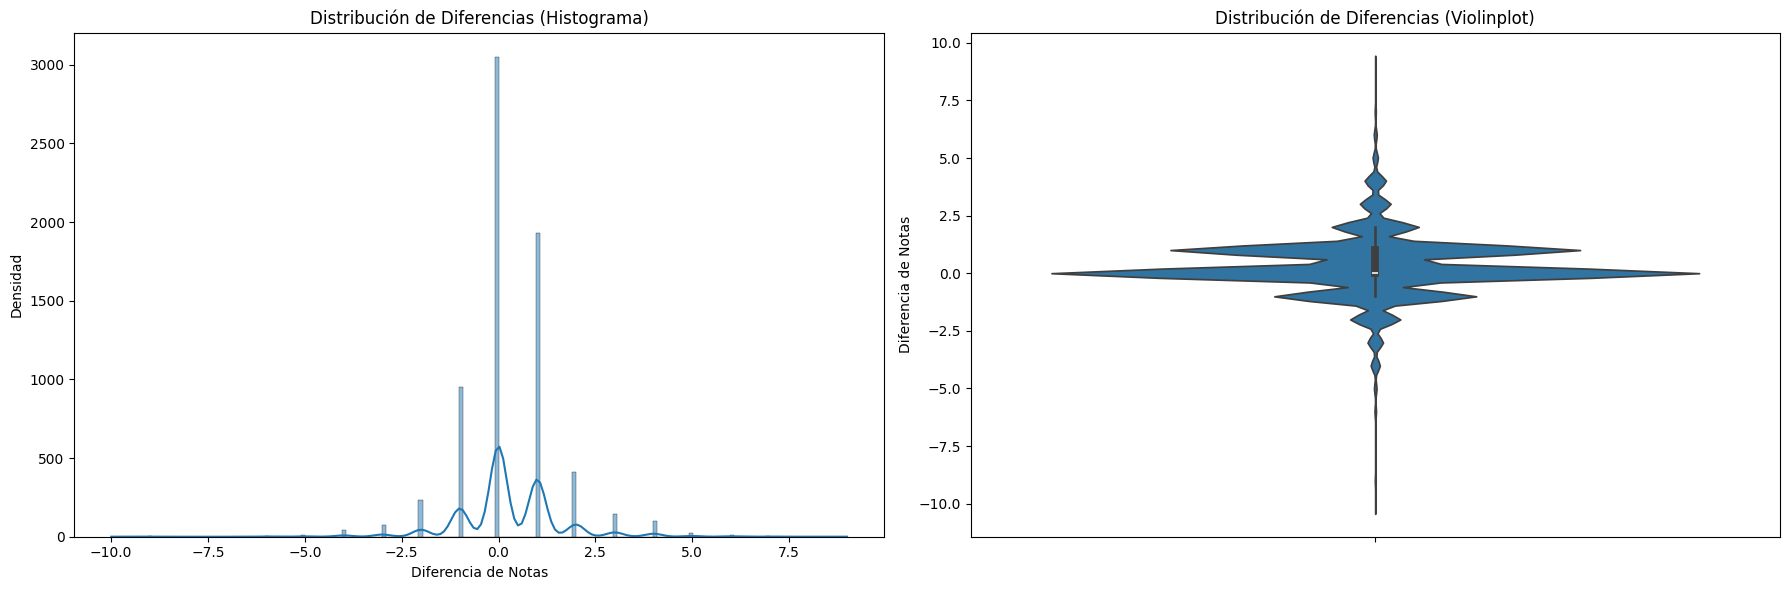

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(df_estudiantes["diferencia_notas"], kde=True, ax=axes[0])
axes[0].set_title("Distribución de Diferencias (Histograma)")
axes[0].set_xlabel("Diferencia de Notas")
axes[0].set_ylabel("Densidad")

sns.violinplot(y="diferencia_notas", data=df_estudiantes, ax=axes[1])
axes[1].set_title("Distribución de Diferencias (Violinplot)")
axes[1].set_ylabel("Diferencia de Notas")

plt.tight_layout()
plt.show()

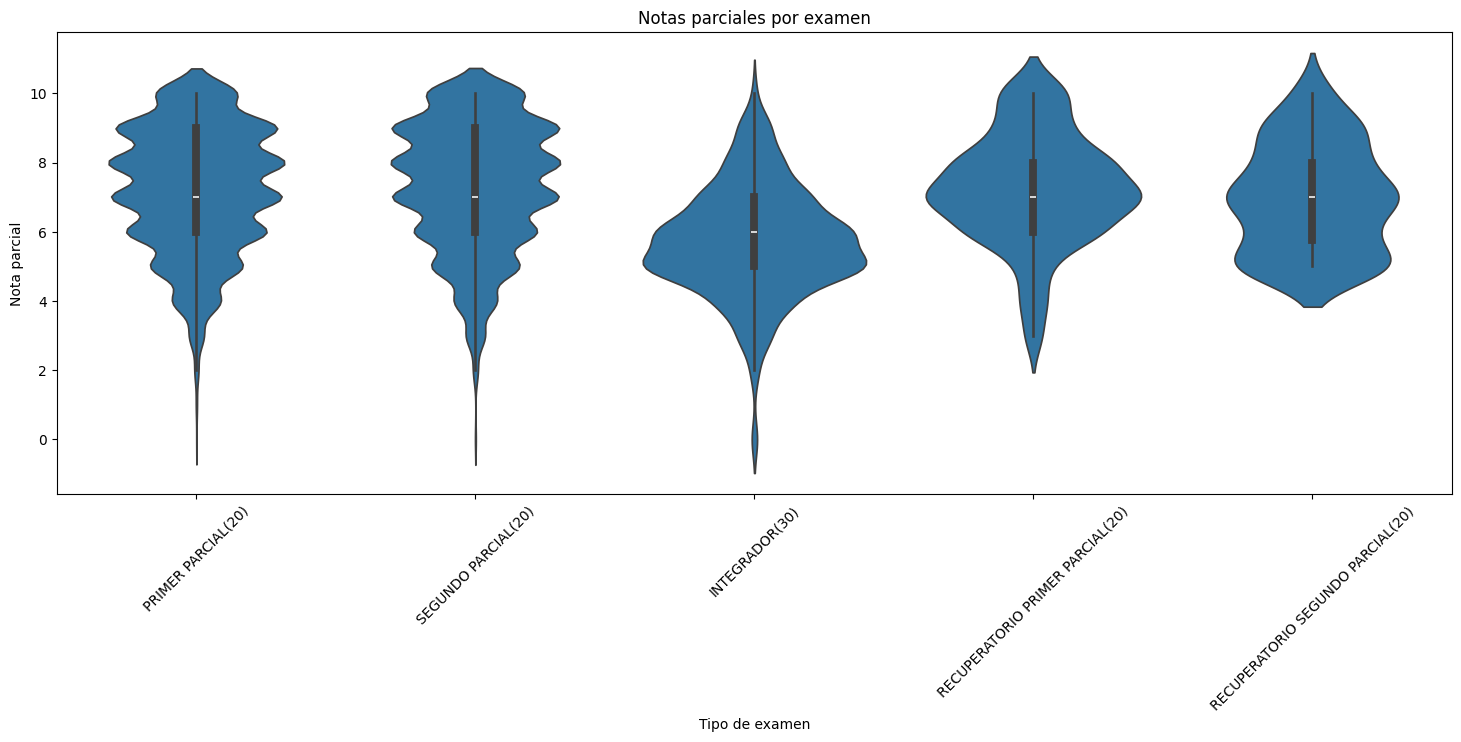

In [7]:
plt.figure(figsize=(18, 6))
sns.violinplot(x="nombre_examen", y="nota_parcial", data=df_estudiantes)
plt.title("Notas parciales por examen")
plt.xlabel("Tipo de examen")
plt.ylabel("Nota parcial")
plt.xticks(rotation=45)
plt.show()

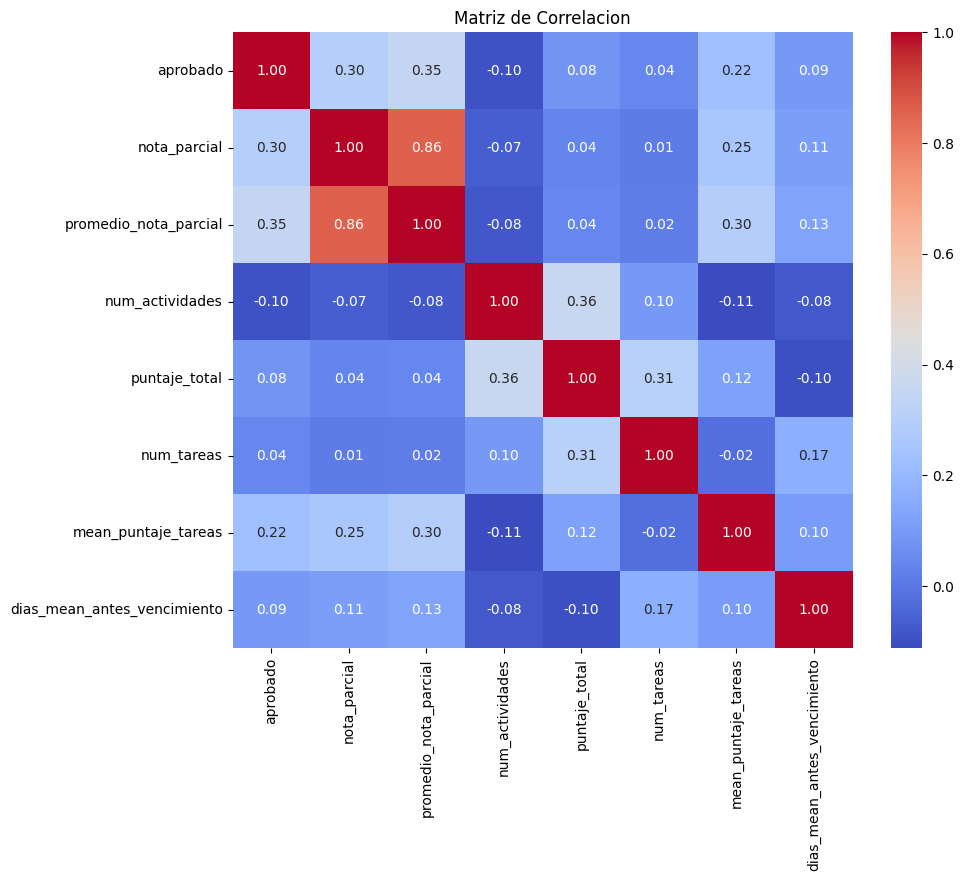

In [12]:
variables_relevantes = ["aprobado", "nota_parcial", "promedio_nota_parcial",
                       "num_actividades", "puntaje_total", "num_tareas", "mean_puntaje_tareas", 
                       "dias_mean_antes_vencimiento"]

df_filtrado = df_estudiantes[variables_relevantes].copy()  

df_filtrado.fillna(df_filtrado.mean(), inplace=True)  

matriz_correlacion = df_filtrado.corr()

correlaciones_con_aprobado = matriz_correlacion["aprobado"].drop("aprobado")  

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlacion")
plt.show()

interval columns not set, guessing: ['aprobado']


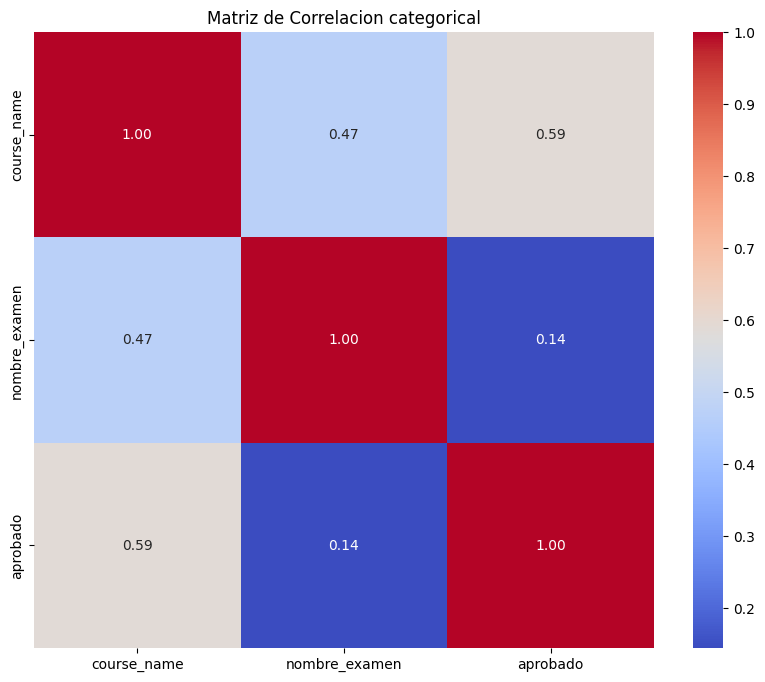

In [13]:
correlations_categorical = phik_matrix(df_estudiantes[["course_name","nombre_examen","aprobado"]])
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_categorical, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlacion categorical")
plt.show()

In [ ]:
# notas

# continuar con EDA
# buscar relaciones entre varaibles con pearson
# hacer analisis temporal
# filtros por curso y periodo, querias ver los mejores y peores
# mostrar top de almunos y los que necesitan mas ayuda
# meter algun test tipo anova / ttest para saber si las diferencias en las notas son significativas
# buscar caracteristicas nueavs para el modelado en base a este analisis 

In [5]:
df_entregas = pd.read_csv("../data/df_entregas.csv")
df_entregas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43119 entries, 0 to 43118
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_uuid               43119 non-null  object 
 1   course_uuid             43119 non-null  object 
 2   legajo                  43119 non-null  object 
 3   course_name             43119 non-null  object 
 4   periodo                 43119 non-null  object 
 5   particion               43119 non-null  int64  
 6   assignment_id           26061 non-null  float64
 7   ass_name                43119 non-null  object 
 8   ass_name_sub            24206 non-null  object 
 9   sub_uuid                24206 non-null  object 
 10  submission_type         24206 non-null  object 
 11  ass_created_at          43119 non-null  object 
 12  ass_due_at              41011 non-null  object 
 13  ass_unlock_at           39195 non-null  object 
 14  ass_lock_at             40917 non-null